<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://drive.google.com/uc?id=1Z28D9EByVRTyiKZspxKpRgckW7dVVnKi">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Assignment Info -->  
        <center>
        <h2>COMP9517 Computer Vision 20T2</h2>
          <h3>Lab 03</h3>
          <br>
        <strong>Student Name: Raymond Lu<br>Student Number: z5277884</strong>
    </center>
    <!-- Assignment Info -->	
  </div>
<!-- ---------------------------------------------------- -->

In order to make the code style neat, some modifications are made to the code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image

## Task 1 & Task 2

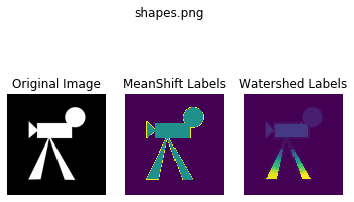

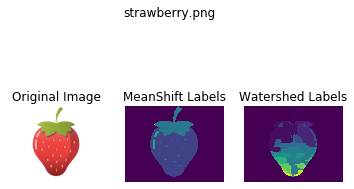

In [2]:
size = 100, 100

img_names = ["shapes.png", "strawberry.png"]
ext_names = ["coins.png", "kiwi.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]


def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()


for img_path in images:
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]

    #
    # +--------------------+
    # |     Task 1         |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.

    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    
    channel_shape = img_mat[:,:,0].shape
    
    R_channel = img_mat[:,:,0].flatten()
    G_channel = img_mat[:,:,1].flatten()
    B_channel = img_mat[:,:,2].flatten()
    
    
    # Step 2 - Combine the three colour channels by flatten each channel 
	# then stacking the flattened channels together.
    # This gives the "colour_samples"
    
    colour_samples = np.reshape(img_mat,(-1,img_mat.shape[-1]))

    # Step 3 - Perform Meanshift  clustering
    # For larger images, this may take a few minutes to compute.
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)

    # Step 4 - reshape ms_labels back to the original image shape 
	# for displaying the segmentation output 
	
    ms_labels = np.reshape(ms_labels,channel_shape)
    dot_index = img_path.find('.')
    result_path = img_path[:dot_index]+"_ms.png"
    mpimg.imsave(result_path,ms_labels)

    #%%
    #
    # +--------------------+
    # |     Task 2         |
    # +--------------------+
    #

    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_gray = img.convert('L')
    img_array = np.array(img_gray)
    
	
    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)
	
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    local_max = peak_local_max(distance,indices=False,footprint=np.ones((3,3)),labels=img_array)
    markers = ndi.label(local_max)[0]
	
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance,markers,mask=img_array)  
    result_path = img_path[:dot_index]+"_ws.png"
    mpimg.imsave(result_path,ws_labels)


    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    # plot_three_images(img_path, img, "Original Image", -distance, "Watershed Distance",
    #                   ws_labels, "Watershed Labels")


## Task 3

### Step 1

In step 1, we first encapsulate the process of MeanShift Segmentation and Watershed Segmentation into two functions.

In [3]:
def mean_shift_seg(img):
    img_mat = np.array(img)[:, :, :3]
    channel_shape = img_mat[:,:,0].shape
    colour_samples = np.reshape(img_mat,(-1,img_mat.shape[-1]))
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)
    return(np.reshape(ms_labels,channel_shape))

def watershed_seg(img):
    img_gray = img.convert('L')
    img_array = np.array(img_gray)
    distance = ndi.distance_transform_edt(img_array)
    local_max = peak_local_max(distance,indices=False,footprint=np.ones((3,3)),labels=img_array)
    markers = ndi.label(local_max)[0]
    ws_labels = watershed(-distance,markers,mask=img_array)
    return(ws_labels)

Initially, we have a look on the output of unmodified MeanShift Segmentation and Watershed Segmentation.

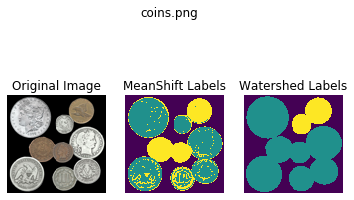

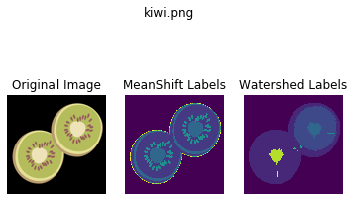

In [4]:
#
# +-------------------+
# |     Task 3        |
# +-------------------+
#
# Loop for the extension component
for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)
    dot_index = img_path.find('.')
    # TODO: perform meanshift on image
    ms_labels = mean_shift_seg(img)  # CHANGE THIS
    result_path = img_path[:dot_index]+"_ms.png"
    mpimg.imsave(result_path,ms_labels)
    

    # TODO: perform an optimisation and then watershed on image
    ws_labels = watershed_seg(img)  # CHANGE THIS
    result_path = img_path[:dot_index]+"_ws.png"
    mpimg.imsave(result_path,ws_labels)

    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")


From the output above, it could be seen that the segmentation between objects is not ideal, as some contours are not detected.

### Step 2

Inspired by Dr. Rashi Agarwal's video: https://www.youtube.com/watch?v=K5P5rjDiZzk, if we transform the grayscale image to black and white image, the edges of segmentation would be clearer. According to Dr. Rashi's idea, using OTSU to find the threshold to transform the grayscale image is chosen.<br>
Moreover, by setting the parameter **watershed_line** equal to True, we can avoid the contour overlapping.

In [5]:
def improved_watershed(img):
    img = np.array(img)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    _,img_bw = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
    distance = ndi.distance_transform_edt(img_bw)
    local_max = peak_local_max(distance,indices=False,footprint=np.ones((3,3)),labels=img_bw)
    markers = ndi.label(local_max)[0]
    ws_labels = watershed(-distance,markers,mask=img_bw,watershed_line=True)
    return (ws_labels)

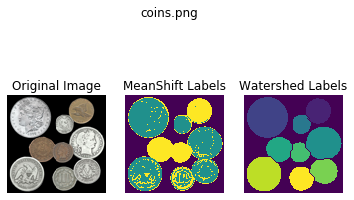

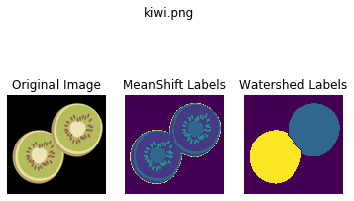

In [6]:
for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)
    dot_index = img_path.find('.')
    # TODO: perform meanshift on image
    ms_labels = mean_shift_seg(img)  # CHANGE THIS
    result_path = img_path[:dot_index]+"_ms.png"
    mpimg.imsave(result_path,ms_labels)

    # TODO: perform an optimisation and then watershed on image
    ws_labels = improved_watershed(img)  # CHANGE THIS
    result_path = img_path[:dot_index]+"_imp_ws.png"
    mpimg.imsave(result_path,ws_labels)

    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

Helpful Links:

1.A demo of the mean-shift clustering algorithm https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html

